# Exploratory Data Analysis

## 1. Data Cleaning and Preparation:

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset into pandas dataframe

df = pd.read_csv("Cardiotocographic.csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
df.dtypes #there are no numerical values stored as string.

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [5]:
df.isnull().sum() #to find if there are any null value in the data set

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
df.shape # to know the total column and rows in dataset

(2126, 14)

In [7]:
# Dropping rows with missing values in LB column since 21 rows is not significant amount of data

df1 = df.dropna(subset=['LB']) #we could drop null values if the NaN value is very less
# df1 = df.fillna(df['LB'].mean()) # or can use mean ,mode or other method to fill the null value
df1.isnull().sum()
# df1

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [8]:
df1.shape

(2105, 14)

In [17]:
# z-scorre for outlier detection
for column in df1.columns:
        z_scores = np.abs((df1[column]-df1[column].mean())/df1[column].std())
        outliers_z = df1[column][z_scores>3] #if z_score is greater than 3 thn it's considered as outlier
        print(f"Outliers detected: in '{column}'")
        print(outliers_z)
        
        
#Though we know the outliers it's very difficult to understand the outliers hence visualization is needed

Outliers detected: in 'LB'
134      52.000000
411     214.000000
610     214.000000
612     214.000000
785      52.000000
1027     51.842487
1103    214.000000
1406    214.000000
1504    214.000000
1834     52.188547
Name: LB, dtype: float64
Outliers detected: in 'AC'
8       0.038567
23     -0.019284
157    -0.019284
181     0.017241
529     0.019284
531     0.016423
626     0.038567
630     0.017391
681    -0.019284
1094    0.017668
1096    0.017341
1231    0.038567
1248    0.017857
1752   -0.019284
1859    0.017073
1918    0.038567
2060    0.038567
Name: AC, dtype: float64
Outliers detected: in 'FM'
13      0.222390
14      0.407840
15      0.380223
16      0.441400
17      0.382622
18      0.450925
19      0.469250
20      0.340045
21      0.425000
22      0.335121
229    -0.480634
408     0.961268
586    -0.480634
682     0.305755
683     0.299456
688     0.235489
689     0.407840
690     0.360417
691     0.455326
692     0.442724
693     0.470392
694     0.477204
695     0.445667

In [18]:
df1.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


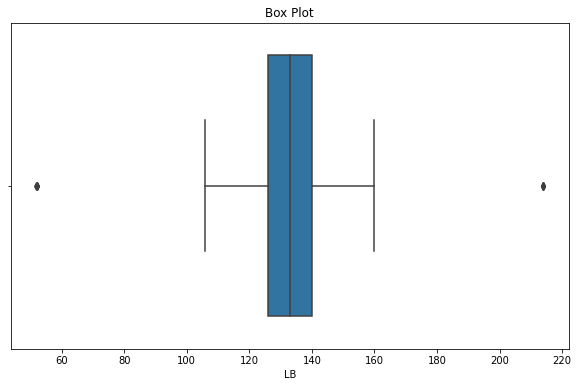

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


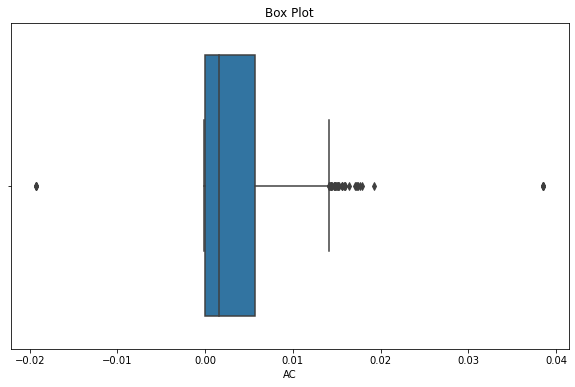

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


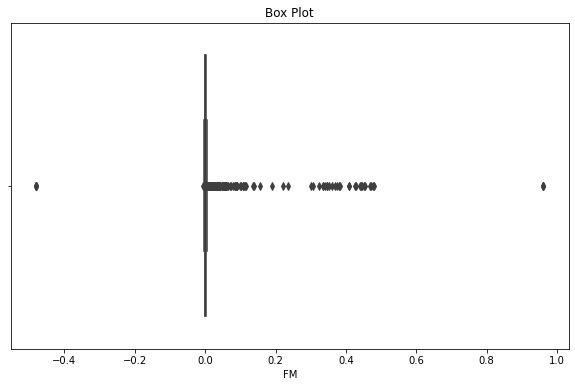

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


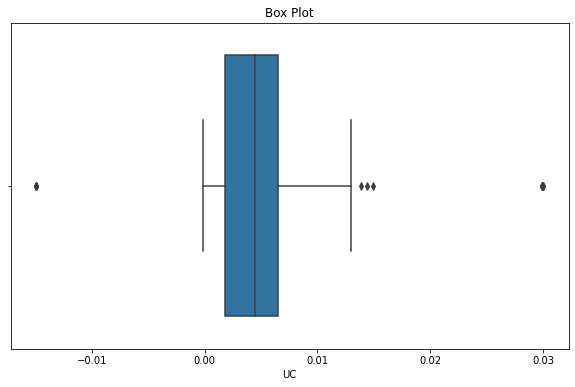

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


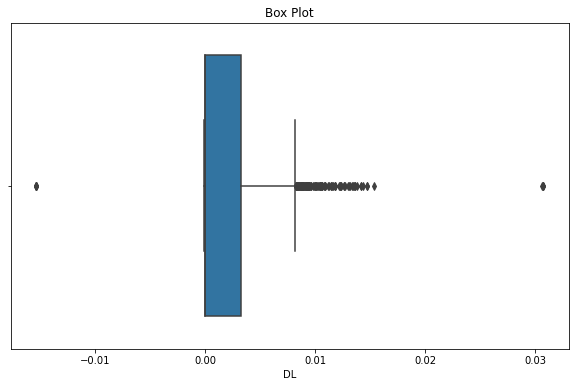

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


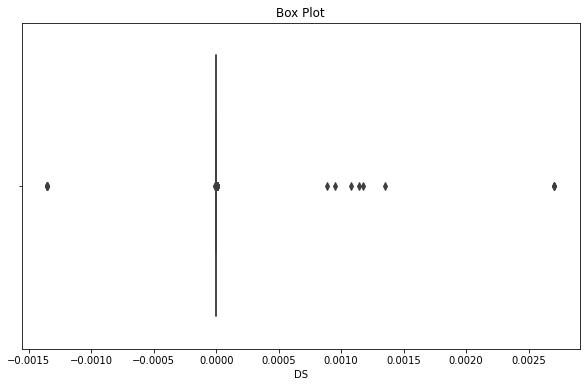

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


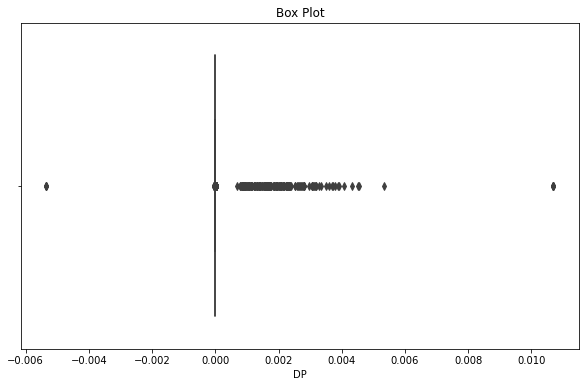

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


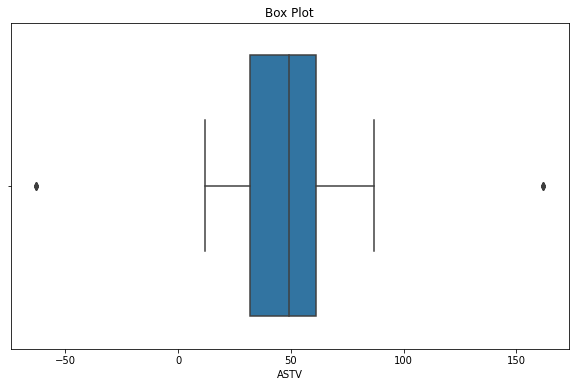

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


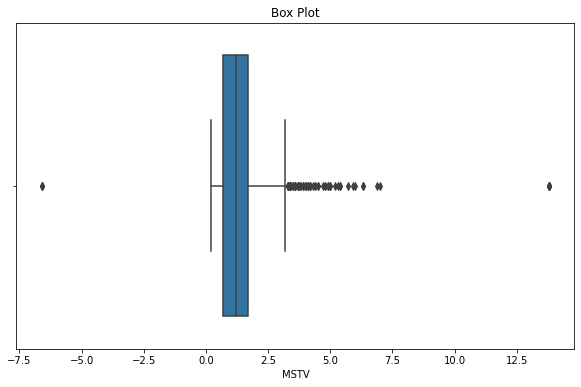

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


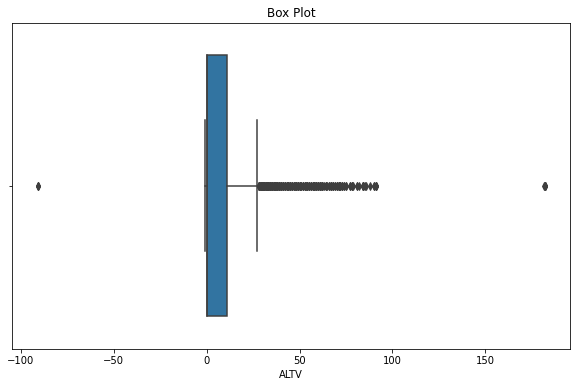

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


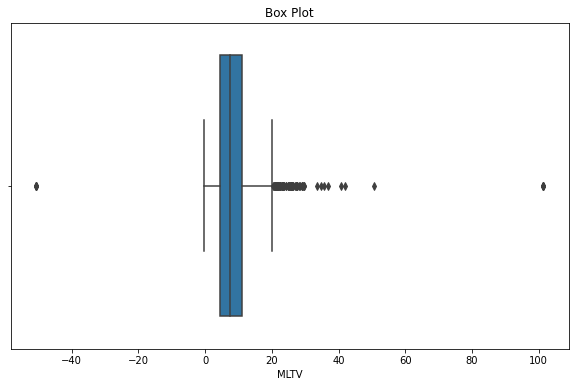

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


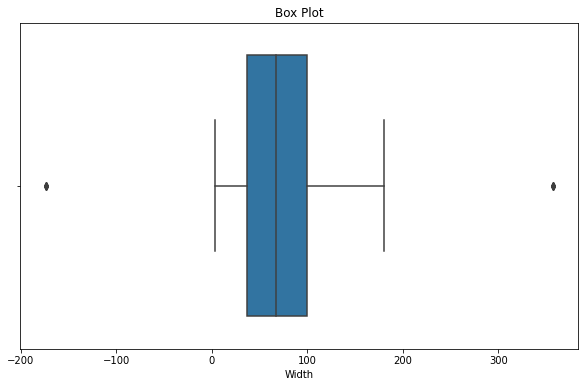

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


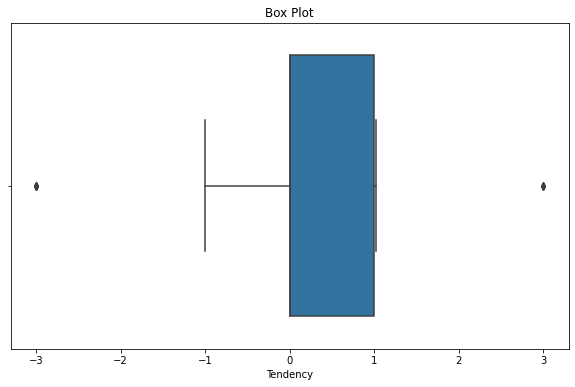

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


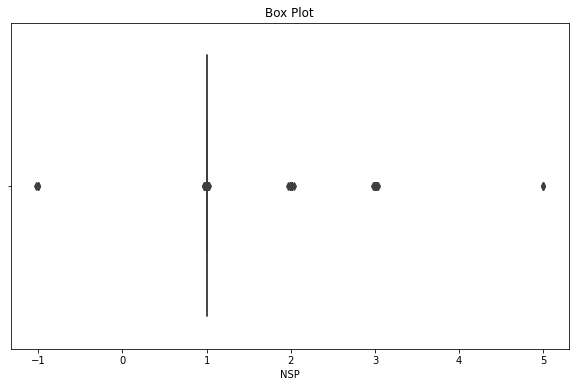

In [14]:
df2 = df1.copy()
for col in df2.columns: #iterate through all the column and print the boxplot to all column
    plt.figure(figsize=(10, 6))
    sns.boxplot(df2[col])
    plt.title('Box Plot')
    plt.show()
    
#identifying outliers is easier using box plot

In [19]:
num_bins = 10
binned_df2=pd.DataFrame()
# Create bins for each numerical column
for column in df2.columns:
    binned_df2[column + '_bin'] = pd.cut(df2[column], bins=num_bins, labels=False)
    
print(binned_df2.head())

   LB_bin  AC_bin  FM_bin  UC_bin  DL_bin  DS_bin  DP_bin  ASTV_bin  MSTV_bin  \
0       4       3       3       3       3       3       3         6         3   
1       4       4       3       4       4       3       3         3         4   
2       5       3       3       5       4       3       3         3         4   
3       5       3       3       5       3       3       3         3         4   
4       4       4       3       5       3       3       3         3         4   

   ALTV_bin  MLTV_bin  Width_bin  Tendency_bin  NSP_bin  
0         4         3          4             6        5  
1         3         4          5             4        3  
2         3         4          5             4        3  
3         3         4          5             6        3  
4         3         4          5             6        3  


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


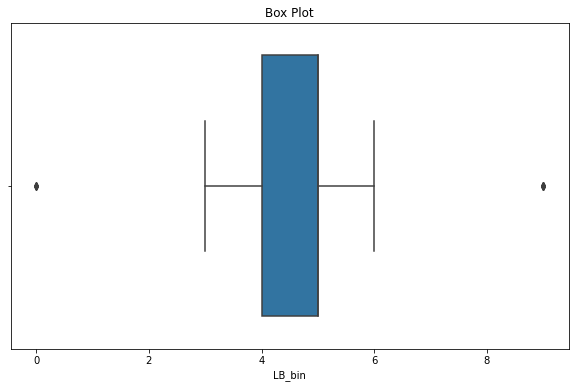

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


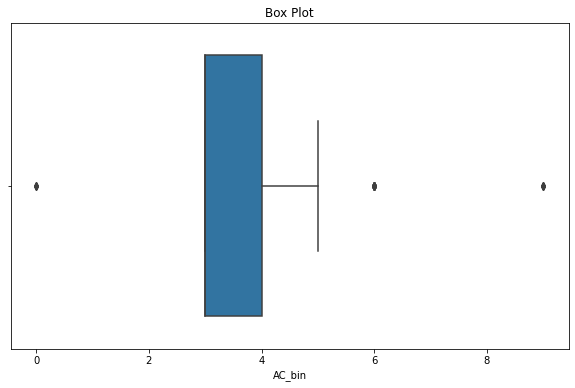

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


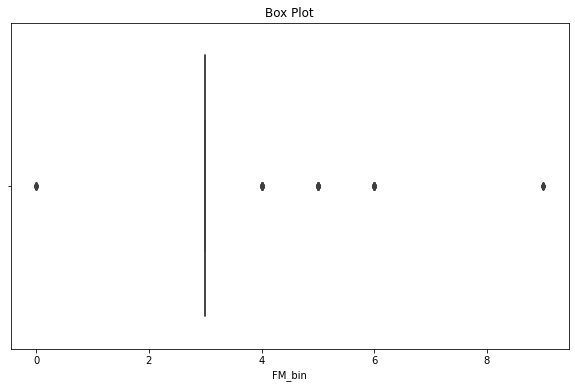

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


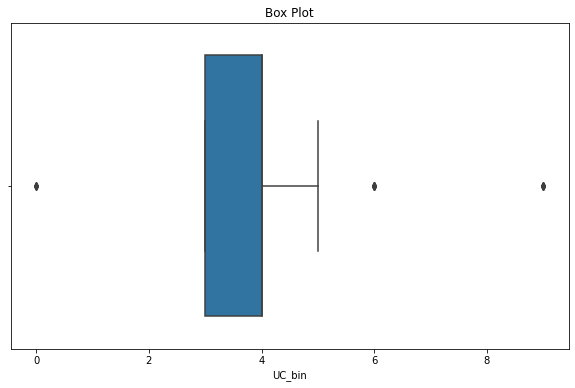

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


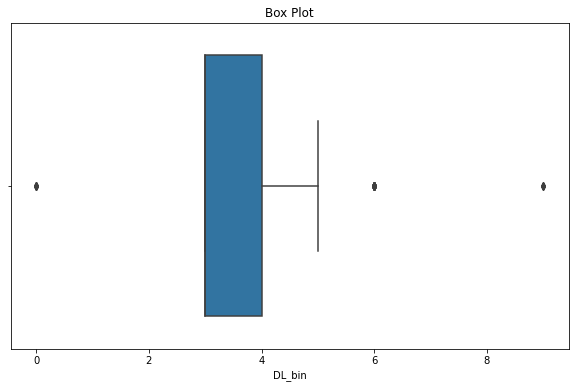

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


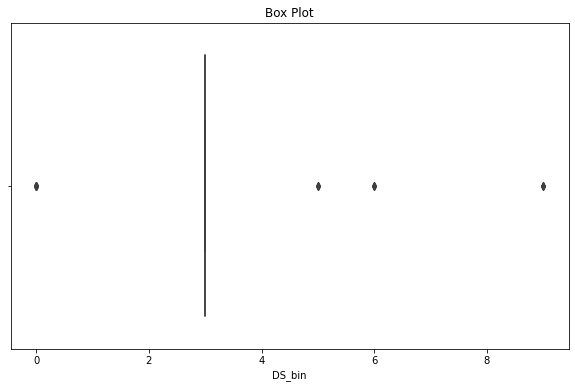

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


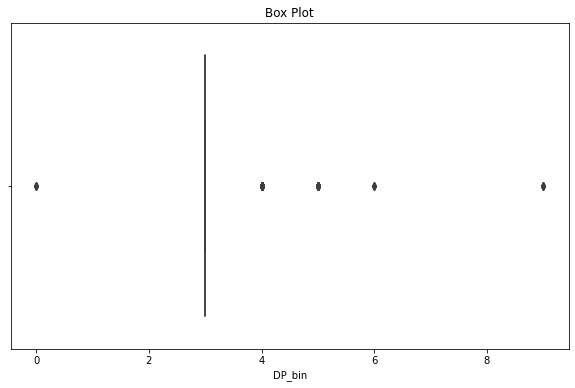

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


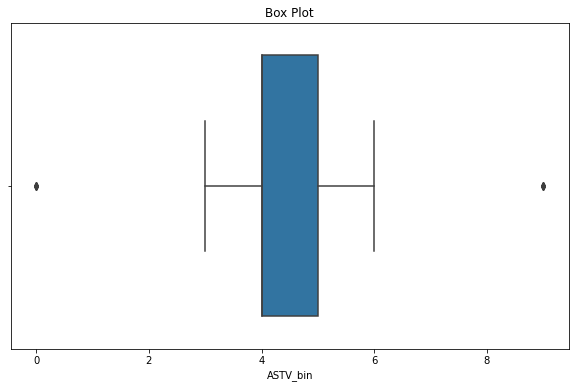

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


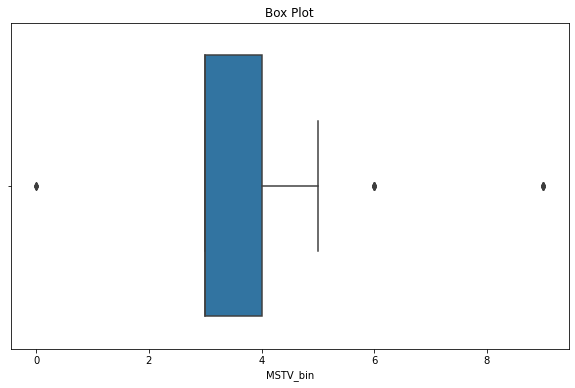

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


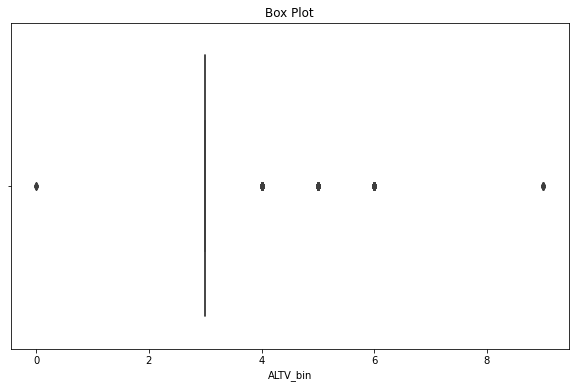

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


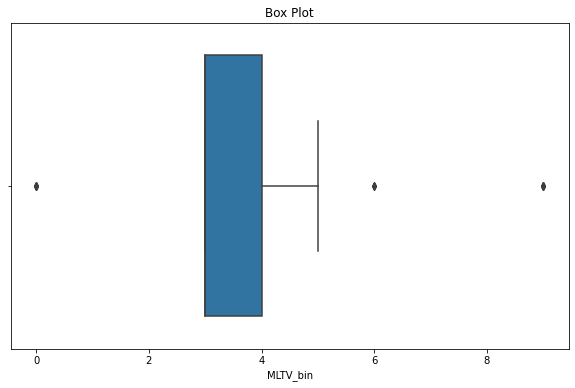

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


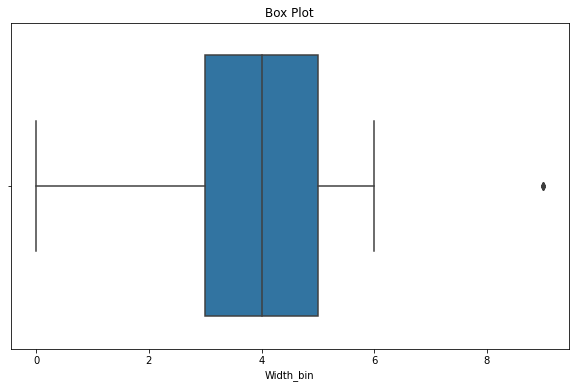

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


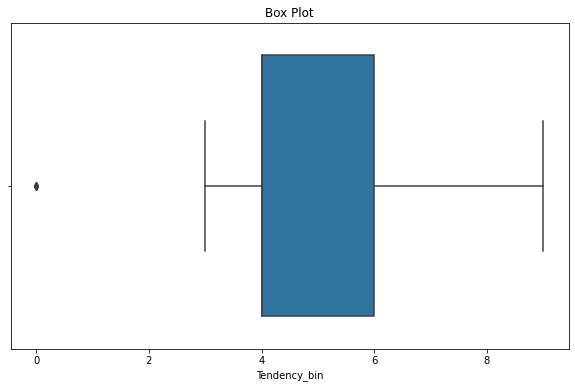

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


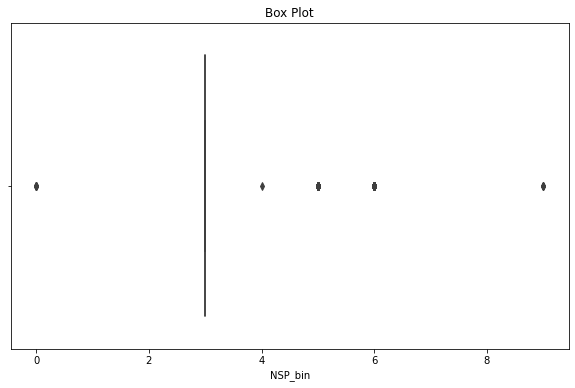

In [20]:
for col in binned_df2.columns: #iterate through all the column 
    plt.figure(figsize=(10, 6))
    sns.boxplot(binned_df2[col])
    plt.title('Box Plot')
    plt.show()
#plotting the graph to see the outliers and itseems tht the num of outliers is reduced

## 2. Statistical Summary

In [32]:
binned_df2.describe()

,LB_bin,AC_bin,FM_bin,UC_bin,DL_bin,DS_bin,DP_bin,ASTV_bin,MSTV_bin,ALTV_bin,MLTV_bin,Width_bin,Tendency_bin,NSP_bin
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4.542043,3.433254,3.040855,3.817102,3.340143,3.005701,3.092637,4.381473,3.352019,3.294062,3.315439,4.086461,4.726841,3.525891
std,0.718618,0.723345,0.425252,0.749076,0.697789,0.315876,0.478102,0.903804,0.634164,0.729269,0.591668,0.877546,1.114614,1.052979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
50%,5.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000
75%,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000,5.000000,6.000000,3.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


## 3. Data Visualization

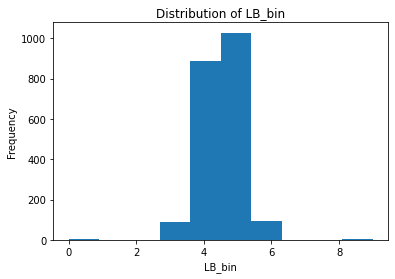

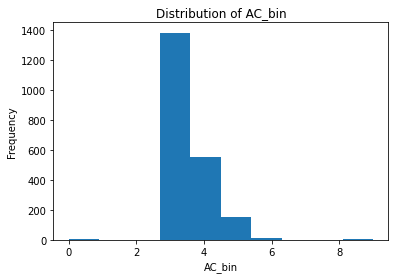

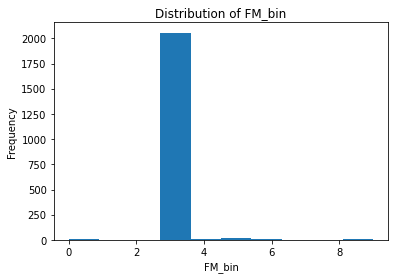

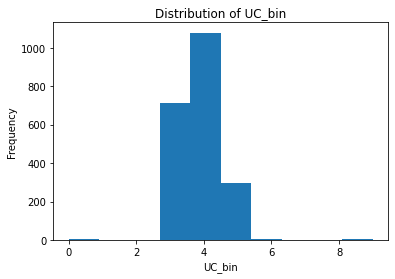

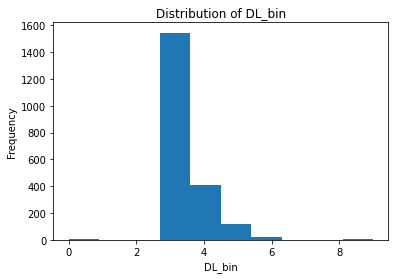

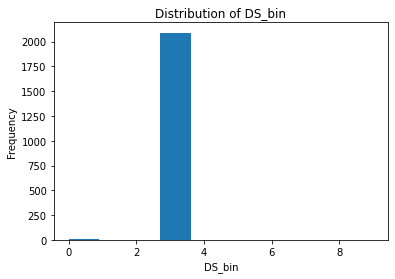

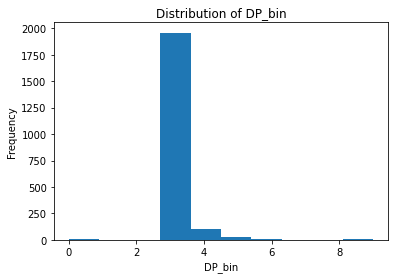

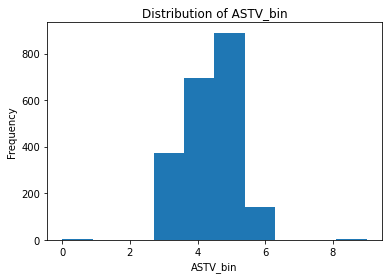

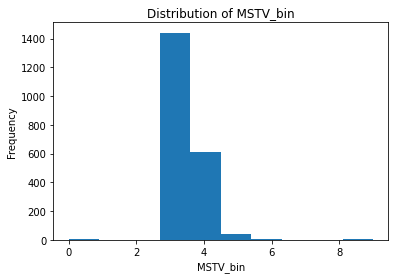

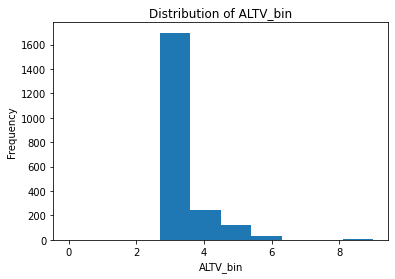

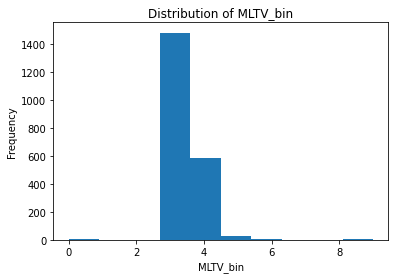

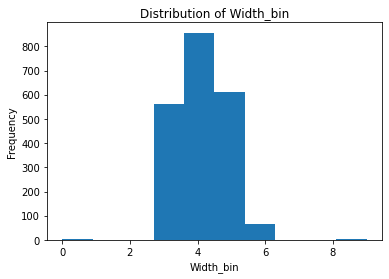

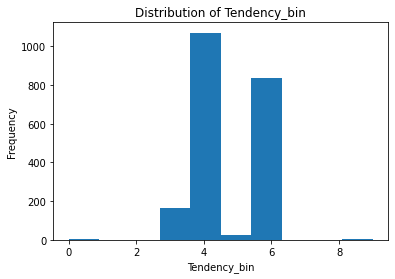

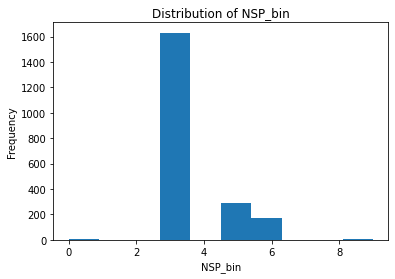

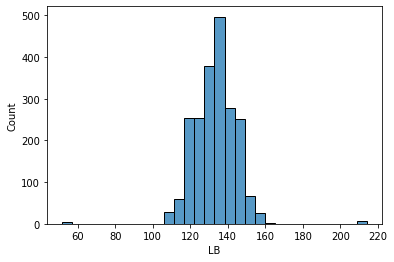

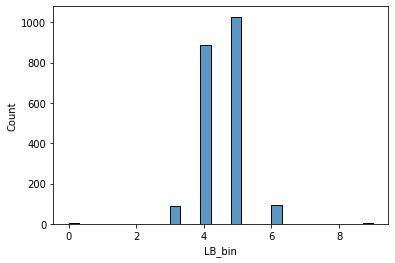

In [36]:
# Using plt.hist
for col in binned_df2:
    plt.hist(binned_df2[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + col)
    plt.show()
    plt.clf() 

sns.histplot(data=df1["LB"],bins =30) #histogram before performing outlier treatment
plt.show()

sns.histplot(data=binned_df2["LB_bin"],bins =30)#histogram after performing outlier treatment
plt.show()


* there are no categorical variables

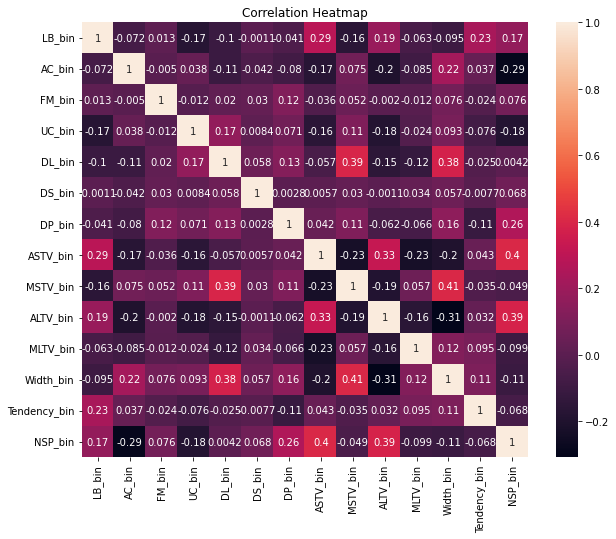

In [39]:
# generating heatmap to explore relationships between variables

corr_df = binned_df2.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_df, annot=True)  # Display correlation values on the heatmap
plt.title('Correlation Heatmap')
plt.show()


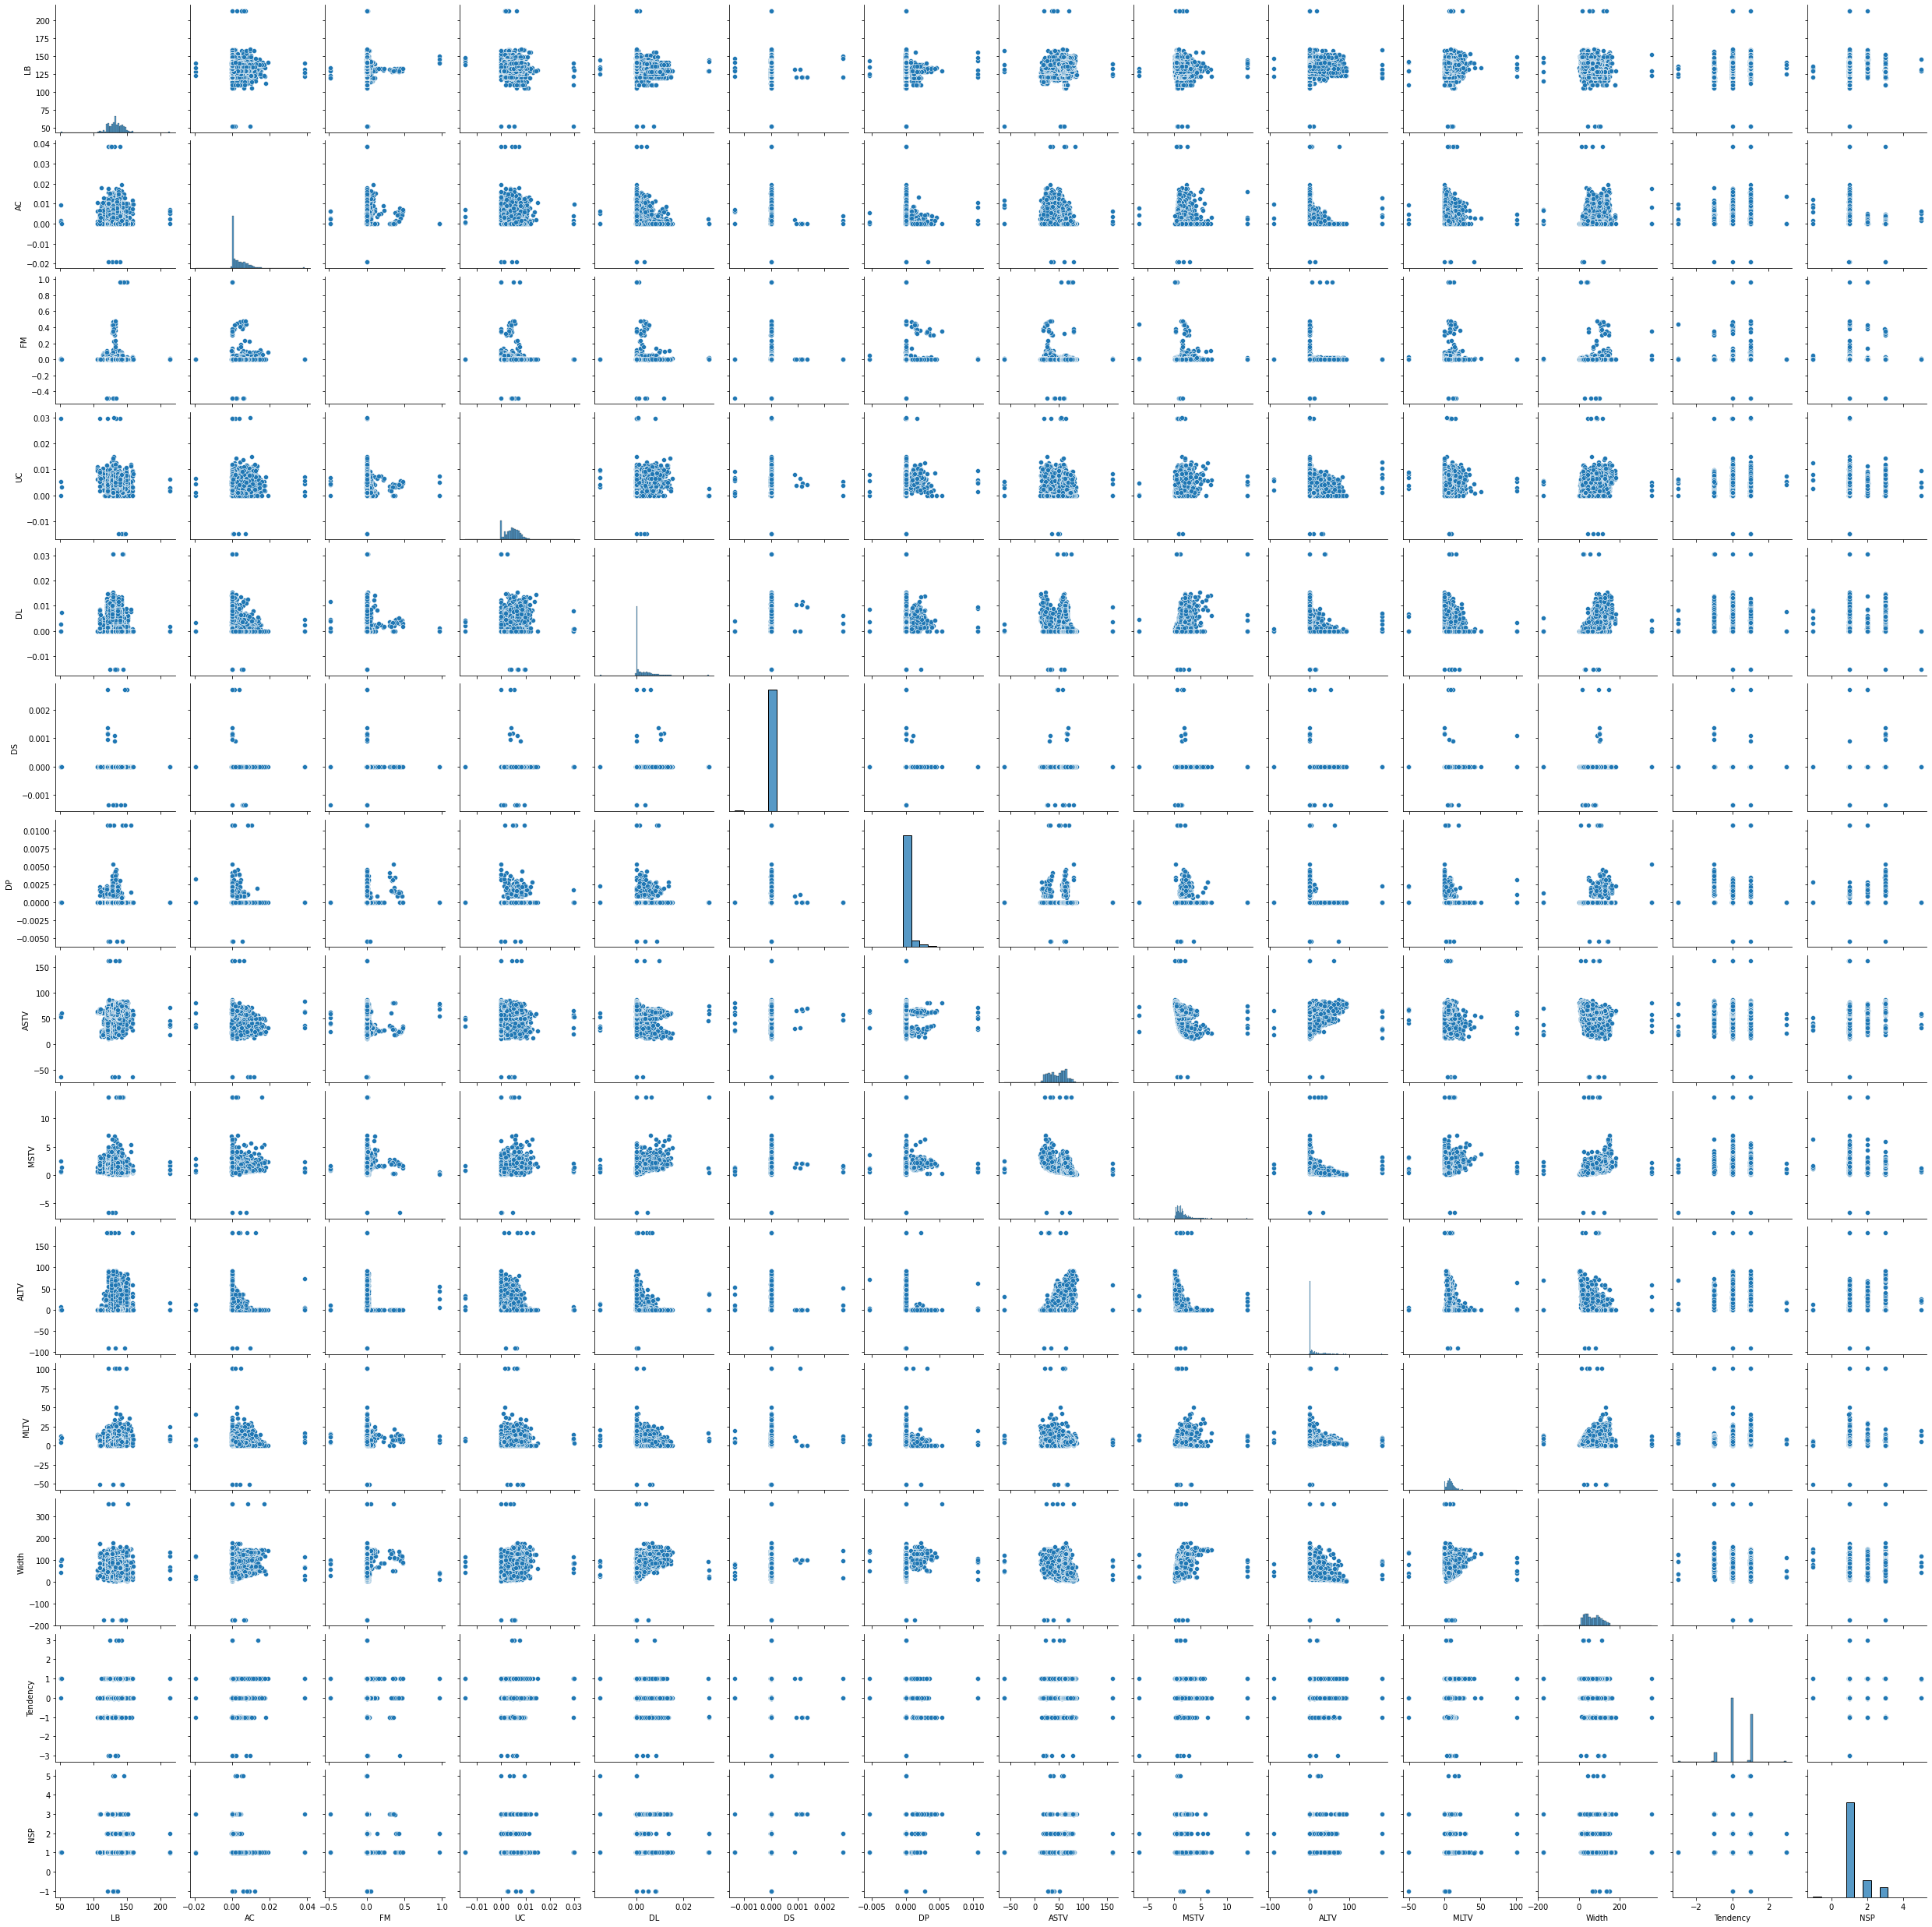

In [40]:
# Employing advanced visualization techniques for deeper insights
#pairplot
sns.pairplot(df1)
plt.show()


## 4. Pattern Recognition and Insights

positive correlations:

* When the fetal heart rate increases (LB), we usually see more fetal movements (AC), indicating good health (0.74).

* fetal movements (FM) can cause accelerations in heart rate (AC), showing a mild connection (0.24).

* Measures like short-term variability (MSTV) and long-term variability (ALTV) are related (0.42), reflecting different heart rate patterns.


negative correlation:

* Higher baseline heart rates (LB) might mean less long-term variability (MLTV), showing a moderate connection (-0.35).

* Higher variability (ASTV) might indicate a more stable fetal state compared to a tendency towards abnormal states (-0.21).